# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/scgiller/DSI-Projects/week2/Project 2/Data/billboard.csv', encoding='latin-1')

In [3]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23,18,...,*,*,*,*,*,*,*,*,*,*
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47,45,...,*,*,*,*,*,*,*,*,*,*


In [4]:
df.dtypes

year                int64
artist.inverted    object
track              object
time               object
genre              object
date.entered       object
date.peaked        object
x1st.week           int64
x2nd.week          object
x3rd.week          object
x4th.week          object
x5th.week          object
x6th.week          object
x7th.week          object
x8th.week          object
x9th.week          object
x10th.week         object
x11th.week         object
x12th.week         object
x13th.week         object
x14th.week         object
x15th.week         object
x16th.week         object
x17th.week         object
x18th.week         object
x19th.week         object
x20th.week         object
x21st.week         object
x22nd.week         object
x23rd.week         object
                    ...  
x47th.week         object
x48th.week         object
x49th.week         object
x50th.week         object
x51st.week         object
x52nd.week         object
x53rd.week         object
x54th.week  

In [5]:
# Explore data: look at basic summary stats for choice numerical columns, look at counts for year/artist/song/genre
np.mean(df['x1st.week'])

79.9589905362776

In [6]:
# Explore extremes of weekly ranking fields
print "First Week Min: ", np.min(df['x1st.week'])
print "First Week Max: ", np.max(df['x1st.week'])
print "Last Week Min: ", np.min(df['x76th.week'])
print "Last Week Max: ", np.max(df['x76th.week'])

First Week Min:  15
First Week Max:  100
Last Week Min:  *
Last Week Max:  *


In [7]:
# Make sure data only includes the year 2000
df['year'].value_counts()

2000    317
Name: year, dtype: int64

In [8]:
# Total unique artists
len(set(df['artist.inverted']))

228

In [9]:
# Check unique list of artists
top_artists = df['artist.inverted'].value_counts()
top_artists.head()

Jay-Z                  5
Houston, Whitney       4
Dixie Chicks, The      4
DMX                    3
Aguilera, Christina    3
Name: artist.inverted, dtype: int64

In [10]:
# Jay-Z has the most songs on the list, which songs?
jayz = df.loc[df['artist.inverted'] == 'Jay-Z']
jayz

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
57,2000,Jay-Z,I Just Wanna Love U (Give It 2 Me),"3,50,00 AM",Rap,"October 28, 2000","December 30, 2000",58,45,35,...,*,*,*,*,*,*,*,*,*,*
71,2000,Jay-Z,Big Pimpin',"3,55,00 AM",Rap,"April 22, 2000","July 8, 2000",69,52,39,...,*,*,*,*,*,*,*,*,*,*
192,2000,Jay-Z,Anything,"3,41,00 AM",Rap,"February 26, 2000","March 11, 2000",72,58,55,...,*,*,*,*,*,*,*,*,*,*
226,2000,Jay-Z,Do It Again (Put Ya Hands Up),"3,47,00 AM",Rap,"January 15, 2000","January 29, 2000",95,68,65,...,*,*,*,*,*,*,*,*,*,*
264,2000,Jay-Z,Hey Papi,"3,40,00 AM",Rap,"August 12, 2000","October 7, 2000",98,100,98,...,*,*,*,*,*,*,*,*,*,*


In [11]:
# Check unique list of track names
track_dups = df['track'].value_counts()
track_dups.head()

Where I Wanna Be              2
If You Don't Wanna Love Me    1
Just Be A Man About It        1
With Arms Wide Open           1
Girls Dem Sugar               1
Name: track, dtype: int64

In [12]:
# There are two songs named "Where I Wanna Be"
whereiwannabe = df.loc[df['track'] == 'Where I Wanna Be']
whereiwannabe

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
118,2000,"Jones, Donell",Where I Wanna Be,"6,22,00 AM",Rock,"April 22, 2000","July 8, 2000",81,71,65,...,*,*,*,*,*,*,*,*,*,*
305,2000,"Sheist, Shade",Where I Wanna Be,"4,16,00 AM",Rap,"November 11, 2000","November 18, 2000",96,95,99,...,*,*,*,*,*,*,*,*,*,*


In [13]:
# Check unique genre list
df['genre'].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The Billboard dataset includes a single record for every song that was ranked on the Billboard Top 100 list for at least a week during the year 2000. In addition to the artist and track name, the data includes the genre of music, the length of the track, date the song debuted on the list, the date the song peaked on the list, and fields for the rank of each week the song was on the list. 

The shortest song was 2 minutes and 36 seconds, while the longest song was 7 minutes and 50 seconds. Of the 228 different artists to appear on the list, 64 different artists had more than one song make the list. Jay-Z had the most individual songs, with five different tracks making the list. 

There are two different songs titled, "Where I Wanna Be," that made the list. The Donell Jones version is classified as Rock, while the Shade Sheist version is classified as Rap and is two minutes shorter.

Four songs registered as making the list for more than 52 weeks. Somehow, all four of these songs debuted at number 81 on the Billboard chart. Three of these songs debuted in 1999. One of the songs, Amazed by Lonestar, debuted on 6/5/1999 and did not register for the list between its 21st and 29th week, returning to the list 30 weeks after its initial debut. Another song, Higher, by Creed, debuted on 9/11/1999 and did not register for the list between its 21st and 28th week, returning to the list 29 weeks after its inital debut.

A very high percentage of songs are considered "Rock" or "Rock 'n' Roll."

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

Below are the steps to lightly clean the Billboard dataset. 

I decided to rename all "Rock 'n' Roll" songs as "Rock" after deciding that I did not have faith in the Genre field for the purposes of analysis. Too much of the field as given does not match my understanding of music. I standardized the spelling for "R&B."

In order to perform a "replace" function on the full dataset to remove all "asterisks" I first changed the artist name "A'asterisk'Teams" to "A_Teams." I did not see the benefit of rearranging the artist name (solo artists who go by their full name are currently listed as 'Last name, First name'). Solo artists who go by a stage name did not have their names inverted (see: Trick Daddy). Similary, group names that begin with "The" are inverted to facilitate sorting (see: Backstreet Boys, The).

In order to perform calculations on the weekly ranking variables, I removed all "asterisks" and changed each week field to a float. For some reason, weeks 25 through 27 were not given "asterisks" to denote missing rankings. I felt comfortable assigning these a traditional NaN value.

In order to determine the min and max time of each song, I converted the time field to a float.

In [14]:
# clean genre
df['genre'][df['genre']=='R & B'] = 'R&B'
df['genre'][df['genre']=='Rock\'n\'roll'] = 'Rock'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
# clean name
df['artist.inverted'][df['artist.inverted']=='A*Teams'] = 'A_Teams'

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
# clean all .week '*'
df = df.replace('*', np.nan)
# turn all .week fields into numbers
df.iloc[:,8:] = df.iloc[:,8:].applymap(lambda x:float(x))

In [17]:
# clean time

# change time into float
df['time'] = df['time'].str.replace(',00 AM', '')
df['time'] = df['time'].str.replace(',', '.')
df['time'] = df['time'].convert_objects(convert_numeric=True)

# Find min and max time
print "First Week Min: ", np.min(df['time'])
print "First Week Max: ", np.max(df['time'])

First Week Min:  2.36
First Week Max:  7.5


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [18]:
# transpose dataset from wide to long using melt
df_long = pd.melt(df,
                 id_vars=['year','artist.inverted','track','time','genre','date.entered','date.peaked'],
                  var_name='week',
                  value_name='ranking')

In [19]:
# remove all NaN values from new 'ranking' column
df_long2 = df_long[np.isfinite(df_long['ranking'])]

# convert week into new numeric variable
df_long2['week_num'] = df_long2['week'].str.replace('.week','')
df_long2['week_num'] = df_long2['week_num'].str.replace('x','')
df_long2['week_num'] = df_long2['week_num'].str.replace('st','')
df_long2['week_num'] = df_long2['week_num'].str.replace('nd','')
df_long2['week_num'] = df_long2['week_num'].str.replace('rd','')
df_long2['week_num'] = df_long2['week_num'].str.replace('th','')
df_long2['week_num'] = df_long2['week_num'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [20]:
# sort dataset by Track, Artist, and Week
df_long2.sort_values(['track','artist.inverted','week_num'])

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking,week_num
47,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x1st.week,100.0,1
364,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x2nd.week,99.0,2
681,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x3rd.week,96.0,3
998,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x4th.week,76.0,4
1315,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x5th.week,55.0,5
1632,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x6th.week,37.0,6
1949,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x7th.week,24.0,7
2266,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x8th.week,24.0,8
2583,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x9th.week,30.0,9
2900,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x10th.week,36.0,10


In [21]:
# Collapse dataset by track and arist to find total weeks on list, max rank and min rank
df_long3 = pd.pivot_table(df_long2, index=['artist.inverted','track'], values=['ranking'],
               aggfunc=[len,np.amax, np.amin, np.mean])

In [22]:
# Reset index 
df_long4 = df_long3.reset_index()

In [23]:
df_long4.head()

,artist.inverted,track,len,amax,amin,mean
,,,ranking,ranking,ranking,ranking
0,2 Pac,Baby Don't Cry (Keep Ya Head Up II),7.0,99.0,72.0,85.428571
1,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3.0,92.0,87.0,90.000000
2,3 Doors Down,Kryptonite,53.0,81.0,3.0,26.471698
3,3 Doors Down,Loser,20.0,76.0,55.0,67.100000
4,504 Boyz,Wobble Wobble,18.0,96.0,17.0,56.222222


In [24]:
# Create new DataFrame that isolates Debut Ranking
week1ranks = df_long2[df_long2['week_num'] == 1]

In [25]:
# Sort week1 rank dataset by artist and track 
week1ranks.sort_values(['track','artist.inverted'])

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking,week_num
47,2000,Nelly,(Hot S**t) Country Grammar,4.17,Rap,"April 29, 2000","September 16, 2000",x1st.week,100.0,1
292,2000,Nu Flavor,3 Little Words,3.54,R&B,"June 3, 2000","June 17, 2000",x1st.week,97.0,1
145,2000,"Jean, Wyclef",911,4.00,Rap,"October 7, 2000","November 25, 2000",x1st.week,77.0,1
260,2000,"Brock, Chad",A Country Boy Can Survive,3.54,Country,"January 1, 2000","January 8, 2000",x1st.week,93.0,1
259,2000,"Clark, Terri",A Little Gasoline,3.07,Country,"December 16, 2000","December 16, 2000",x1st.week,75.0,1
103,2000,Son By Four,A Puro Dolor (Purest Of Pain),3.30,Latin,"April 8, 2000","August 19, 2000",x1st.week,80.0,1
137,2000,"Carter, Aaron",Aaron's Party (Come Get It),3.23,R&B,"August 26, 2000","September 16, 2000",x1st.week,99.0,1
40,2000,Nine Days,Absolutely (Story Of A Girl),3.09,Rock,"May 6, 2000","July 22, 2000",x1st.week,85.0,1
306,2000,De La Soul,All Good?,5.02,Rap,"December 23, 2000","December 23, 2000",x1st.week,96.0,1
42,2000,Blink-182,All The Small Things,2.52,Rock,"December 4, 1999","February 19, 2000",x1st.week,89.0,1


In [26]:
# Isolate Key fields in week1 dataset
week1ranks = week1ranks[['artist.inverted','track','ranking']]

In [27]:
# Merge df_long4 pivot table with week1 ranks
df_long5 =  pd.merge(df_long4, week1ranks, left_on=['artist.inverted','track'],right_on=['artist.inverted','track'])

In [28]:
df_long5.head()

,artist.inverted,track,"(artist.inverted, )","(track, )","(len, ranking)","(amax, ranking)","(amin, ranking)","(mean, ranking)",ranking
0,2 Pac,Baby Don't Cry (Keep Ya Head Up II),2 Pac,Baby Don't Cry (Keep Ya Head Up II),7.0,99.0,72.0,85.428571,87.0
1,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3.0,92.0,87.0,90.000000,91.0
2,3 Doors Down,Kryptonite,3 Doors Down,Kryptonite,53.0,81.0,3.0,26.471698,81.0
3,3 Doors Down,Loser,3 Doors Down,Loser,20.0,76.0,55.0,67.100000,76.0
4,504 Boyz,Wobble Wobble,504 Boyz,Wobble Wobble,18.0,96.0,17.0,56.222222,57.0


In [28]:
# Rename new columns
df_long5.columns =('artist.inverted','track','artist2','track2','weeks_on_list','worst_rank','best_rank','avg_rank',
                   'week1rank')

In [29]:
df_long5.head()

,artist.inverted,track,artist2,track2,weeks_on_list,worst_rank,best_rank,avg_rank,week1rank
0,2 Pac,Baby Don't Cry (Keep Ya Head Up II),2 Pac,Baby Don't Cry (Keep Ya Head Up II),7.0,99.0,72.0,85.428571,87.0
1,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3.0,92.0,87.0,90.000000,91.0
2,3 Doors Down,Kryptonite,3 Doors Down,Kryptonite,53.0,81.0,3.0,26.471698,81.0
3,3 Doors Down,Loser,3 Doors Down,Loser,20.0,76.0,55.0,67.100000,76.0
4,504 Boyz,Wobble Wobble,504 Boyz,Wobble Wobble,18.0,96.0,17.0,56.222222,57.0


In [30]:
top_ranks = df_long5[df_long5['best_rank'] == 1.0]

In [31]:
top_ranks

,artist.inverted,track,artist2,track2,weeks_on_list,worst_rank,best_rank,avg_rank,week1rank
8,Aaliyah,Try Again,Aaliyah,Try Again,32.0,59.0,1.0,16.656250,59.0
11,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"Aguilera, Christina",Come On Over Baby (All I Want Is You),21.0,57.0,1.0,19.952381,57.0
13,"Aguilera, Christina",What A Girl Wants,"Aguilera, Christina",What A Girl Wants,24.0,71.0,1.0,19.291667,71.0
52,"Carey, Mariah",Thank God I Found You,"Carey, Mariah",Thank God I Found You,20.0,89.0,1.0,37.000000,82.0
63,Creed,With Arms Wide Open,Creed,With Arms Wide Open,47.0,86.0,1.0,33.829787,84.0
74,Destiny's Child,Independent Women Part I,Destiny's Child,Independent Women Part I,28.0,78.0,1.0,14.821429,78.0
76,Destiny's Child,Say My Name,Destiny's Child,Say My Name,32.0,83.0,1.0,20.875000,83.0
133,"Iglesias, Enrique",Be With You,"Iglesias, Enrique",Be With You,20.0,63.0,1.0,15.850000,63.0
142,Janet,Doesn't Really Matter,Janet,Doesn't Really Matter,24.0,59.0,1.0,19.416667,59.0
179,Lonestar,Amazed,Lonestar,Amazed,55.0,81.0,1.0,26.727273,81.0


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

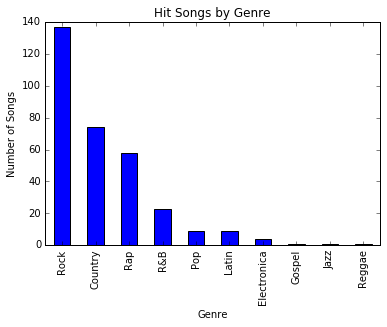

In [32]:
# Hit Songs by Genre
ax = df['genre'].value_counts().plot(kind='bar', title='Hit Songs by Genre', )
ax.set_xlabel('Genre')
ax.set_ylabel("Number of Songs")

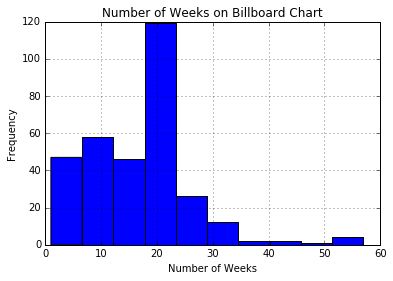

In [33]:
# freq of # of weeks on top chart
df_long3.iloc[:,0].hist()
plt.title("Number of Weeks on Billboard Chart")
plt.xlabel("Number of Weeks")
plt.ylabel("Frequency")

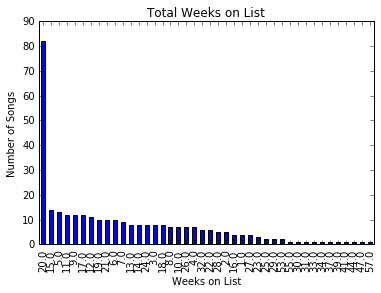

In [34]:
# Why do so many songs stay on the list for exactly 20 weeks?
ax = df_long5['weeks_on_list'].value_counts().plot(kind='bar', title='Total Weeks on List', )
ax.set_xlabel('Weeks on List')
ax.set_ylabel("Number of Songs")

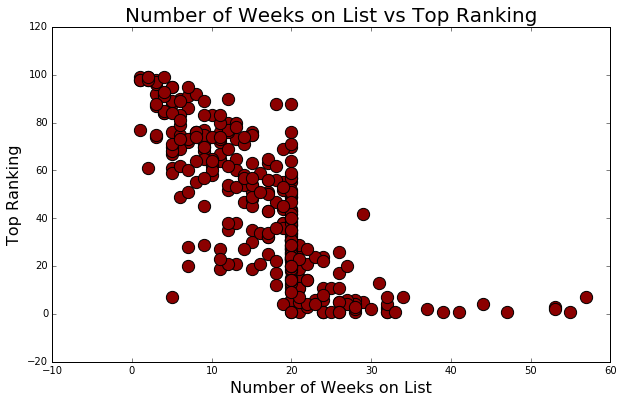

In [35]:
# number of weeks on list vs. top ranking
fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(df_long3.iloc[:,0], df_long3.iloc[:,2], c='darkred', s=150)

axes.set_title('Number of Weeks on List vs Top Ranking', fontsize=20)
axes.set_xlabel('Number of Weeks on List', fontsize=16)
axes.set_ylabel('Top Ranking', fontsize=16)

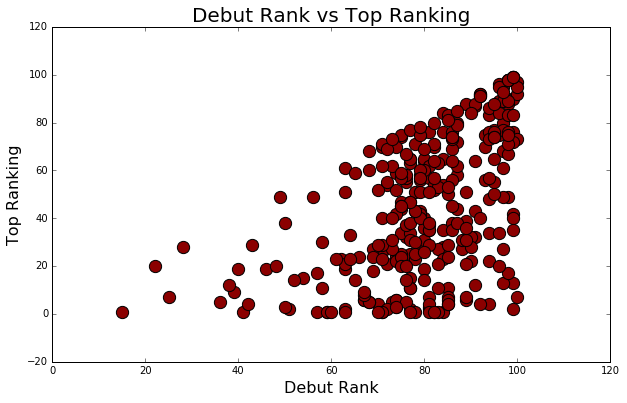

In [36]:
# week 1 rank vs top rank
fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(df_long5['week1rank'], df_long5['best_rank'], c='darkred', s=150)

axes.set_title('Debut Rank vs Top Ranking', fontsize=20)
axes.set_xlabel('Debut Rank', fontsize=16)
axes.set_ylabel('Top Ranking', fontsize=16)

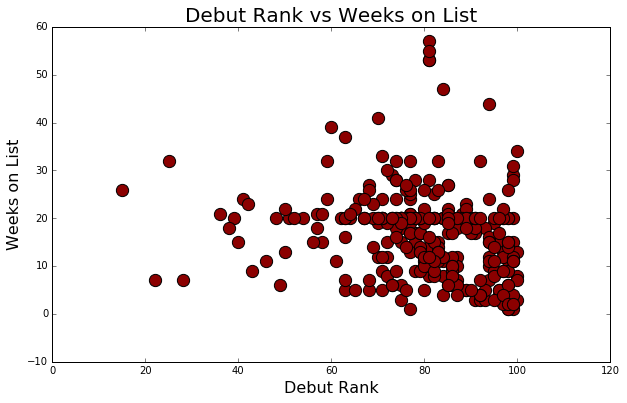

In [37]:
# week 1 rank vs number of weeks on list
fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(df_long5['week1rank'], df_long5['weeks_on_list'], c='darkred', s=150)

axes.set_title('Debut Rank vs Weeks on List', fontsize=20)
axes.set_xlabel('Debut Rank', fontsize=16)
axes.set_ylabel('Weeks on List', fontsize=16)

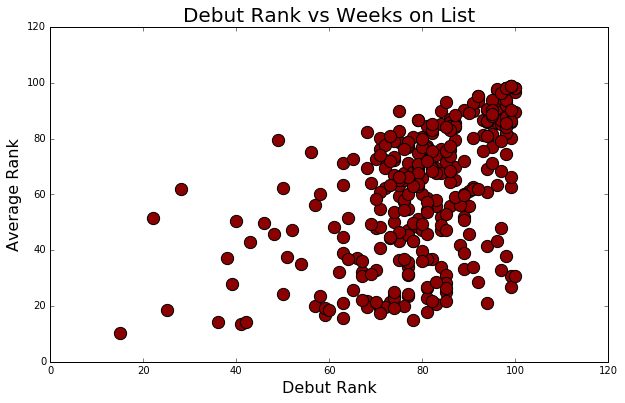

In [38]:
# week 1 rank vs average rank
fig = plt.figure(figsize=(10,6))
axes = fig.gca()

axes.scatter(df_long5['week1rank'], df_long5['avg_rank'], c='darkred', s=150)

axes.set_title('Debut Rank vs Weeks on List', fontsize=20)
axes.set_xlabel('Debut Rank', fontsize=16)
axes.set_ylabel('Average Rank', fontsize=16)

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Is it possible to predict a song's length of stay on the billboard charts or predict the highest position achieved based on the debut position? Are the length of stay or top rank predictive of each other?

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

1. The data provides a few opportunities to explore reasons for the success of a certain song. 
2. Success can be measured by a song's top rank as well as the number of weeks on the chart.
3. Do one of these metrics (top rank/total weeks/debut rank) explain the other? We can run cursory OLS regressions to check.

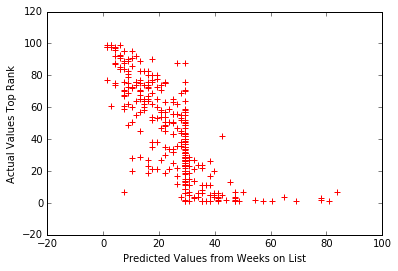

MSE: 2012.15194454


In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X = df_long5["weeks_on_list"]
y = df_long5["best_rank"]

# Note the difference in argument order
best_rank_model = sm.OLS(y, X).fit()
predictions = best_rank_model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Weeks on List")
plt.ylabel("Actual Values Top Rank")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [41]:
print(best_rank_model.summary())

                            OLS Regression Results                            
Dep. Variable:              best_rank   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     123.4
Date:                Fri, 24 Jun 2016   Prob (F-statistic):           1.98e-24
Time:                        11:53:33   Log-Likelihood:                -1655.5
No. Observations:                 317   AIC:                             3313.
Df Residuals:                     316   BIC:                             3317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
weeks_on_list     1.4725      0.133     11.110

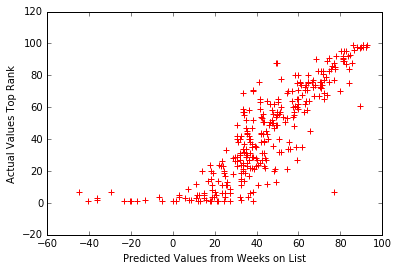

MSE: 235.517962879


In [42]:
X = df_long5[["weeks_on_list","week1rank"]]
X = sm.add_constant(X)
y = df_long5["best_rank"]

# Note the difference in argument order
best_rank_model2 = sm.OLS(y, X).fit()
predictions = best_rank_model2.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Weeks on List")
plt.ylabel("Actual Values Top Rank")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [43]:
print(best_rank_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              best_rank   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     410.5
Date:                Fri, 24 Jun 2016   Prob (F-statistic):           2.41e-88
Time:                        11:53:55   Log-Likelihood:                -1315.5
No. Observations:                 317   AIC:                             2637.
Df Residuals:                     314   BIC:                             2648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            24.0764      5.513      4.367

In [41]:
best_rank_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              best_rank   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     1607.
Date:                Thu, 23 Jun 2016   Prob (F-statistic):          5.55e-166
Time:                        10:53:06   Log-Likelihood:                -1324.8
No. Observations:                 317   AIC:                             2654.
Df Residuals:                     315   BIC:                             2661.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
weeks_on_list    -2.0238      0.088    -23.080      0.000        -2.196    -1.851
week1rank         0.9681      0.021     47.139      0.000         0.928     1.009
==============================================================================
Omnibus:                       14.571   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.129
Skew:                          -0.358   Prob(JB):                     4.26e-05
Kurtosis:                       4.006   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

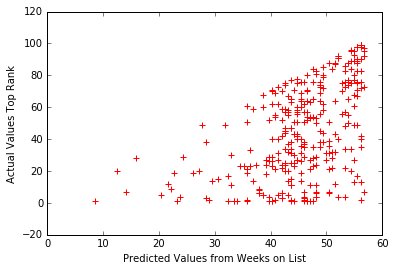

MSE: 672.292935673


In [44]:
X = df_long5["week1rank"]
y = df_long5["best_rank"]

# Note the difference in argument order
best_rank_model3 = sm.OLS(y, X).fit()
predictions = best_rank_model3.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Weeks on List")
plt.ylabel("Actual Values Top Rank")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [45]:
print(best_rank_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              best_rank   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     999.2
Date:                Thu, 23 Jun 2016   Prob (F-statistic):          7.23e-100
Time:                        00:15:42   Log-Likelihood:                -1481.7
No. Observations:                 317   AIC:                             2965.
Df Residuals:                     316   BIC:                             2969.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
week1rank      0.5672      0.018     31.611      0.0

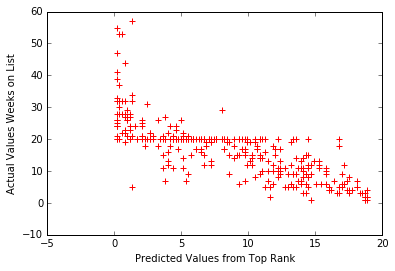

MSE: 260.69113766


In [42]:
X = df_long5["best_rank"]
y = df_long5["weeks_on_list"]

# Note the difference in argument order
weeks_on_list_model = sm.OLS(y, X).fit()
predictions = weeks_on_list_model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Top Rank")
plt.ylabel("Actual Values Weeks on List")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [43]:
print(weeks_on_list_model.summary())

                            OLS Regression Results                            
Dep. Variable:          weeks_on_list   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     123.4
Date:                Thu, 23 Jun 2016   Prob (F-statistic):           1.98e-24
Time:                        00:12:45   Log-Likelihood:                -1331.6
No. Observations:                 317   AIC:                             2665.
Df Residuals:                     316   BIC:                             2669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
best_rank      0.1908      0.017     11.110      0.0

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 